Aplicando restrições na busca
=============================



## Introdução



Muitos problemas de otimização com relevância científica têm uma ou mais `restrições` que devem ser levadas em consideração na hora de resolver o problema.

Lembra do `problema da mochila` que vimos em Lógica Computacional? Era um problema de otimização onde queríamos maximizar o valor dos itens colocados na mochila enquanto observávamos a restrição do peso total dos itens (do contrário, a mochila rasgava).

Uma forma de considerar essas restrições nos problemas é aplicando uma `penalidade` na função objetivo.

Vamos pensar como seria essa penalidade no problema da mochila: a função objetivo é maximizar o valor dos itens na mochila, então é um problema de maximização. A função objetivo pode ser a soma dos itens da mochila. Se fosse só isso, teríamos

$$
f = \sum_{i, i \in \mathrm{mochila}}\mathrm{valor}(i)
$$

No entanto, apenas essa função não resolve o problema! Precisamos levar em consideração o limite de peso da mochila! Para isso, penalizamos a função objetivo levando em consideração essa restrição:

$f=\begin{cases}
0 & \textrm{se peso > limite da mochila}\\
\sum_{i,i\in\mathrm{mochila}}(\mathrm{valor}(i)) & \textrm{se peso} \leq \textrm{limite da mochila}
\end{cases}$

Agora finalmente podemos seguir em frente e resolver o problema.



## Reflexões



Se usarmos a equação de $f$ acima, qual será o valor de $f$ caso não exista uma solução para um certo problema da mochila?

Na equação de $f$ acima nós usamos o valor zero para indicar que uma restrição do problema não foi satisfeita. Você consegue pensar em outra estratégia para penalizar soluções inválidas?



## Objetivo



Encontrar uma solução para o problema da mochila usando algoritmos genéticos. Considere que existem 10 itens diferentes (com pesos e valores diferentes) disponíveis para serem escolhidos.



## Descrição do problema



No problema da mochila você tem um número $n$ de itens disponíveis, cada um com um peso e um valor associado. Sua mochila tem a capacidade de carregar um número $p$ de quilogramas, sendo que mais que isso faz com que sua mochila rasgue e todos os itens dentro dela caiam no chão e se quebrem de maneira catastrófica (indesejado). Sua tarefa é encontrar um conjunto de itens (considerando os $n$ disponíveis) que maximize o valor contido dentro da mochila, porém que tenham um peso dentro da capacidade da mesma.



## Importações



In [1]:
import random as rd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from funcoes import cria_itens
from funcoes import populacao_inicial_mochila
from funcoes import funcao_objetivo_mochila as funcao_objetivo_individuo
from funcoes import funcao_objetivo_pop_mochila
from funcoes import selecao_torneio_max
from funcoes import cruzamento_subconjunto as funcao_cruzamento
from funcoes import mutacao_mochila
from constantes import OBJETOS

## Códigos e discussão



In [2]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 25
CHANCE_CRUZAMENTO = 0.9
CHANCE_MUTACAO = 0.2
NUM_COMBATENTES_NO_TORNEIO = 3
NUM_GERACOES = 100
NUM_GENES = 1

# relacionadas ao problema a ser resolvido
ITENS = cria_itens(15)
P = 20
ITENS

{'item 0': (4.518914228724389, 9.792870322378258),
 'item 1': (9.308943132437314, 9.547215159386596),
 'item 2': (1.9930889567777554, 8.372691748127806),
 'item 3': (0.684514691796686, 9.874594319780684),
 'item 4': (2.819205649124532, 2.6194109039528968),
 'item 5': (2.683165260641145, 2.131334876901836),
 'item 6': (4.979055431954322, 9.554286854703777),
 'item 7': (8.032671692873695, 9.774115026575869),
 'item 8': (7.820702048202943, 6.521691504800269),
 'item 9': (1.1447489271276945, 2.1382299367912436),
 'item 10': (0.8540899760196452, 3.5833463966041834),
 'item 11': (3.4185683055766702, 1.3256450516061735),
 'item 12': (2.808822920817758, 3.52397969527611),
 'item 13': (6.118473533822274, 7.9915298013988),
 'item 14': (7.201003947375215, 5.918504903257251)}

In [3]:
# funções locais (para não ter que colocar as variaveis locais no script
def cria_populacao_inicial(tamanho, nada):
    return populacao_inicial_mochila(tamanho, ITENS)

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_mochila(populacao, ITENS, P)

def funcao_selecao(populacao, fitness):
    return selecao_torneio_max(populacao, fitness, NUM_COMBATENTES_NO_TORNEIO)

def funcao_mutacao(individuo):
    return mutacao_mochila(individuo, ITENS)

In [4]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, NUM_GENES)

lista_fitness_medio = []

melhor_fitness_ja_visto = - float("inf") 

lista_melhor_fitness = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    lista_fitness_medio.append(np.average(fitness))
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if rd.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if rd.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness    
    lista_melhor_fitness.append(melhor_fitness_ja_visto)

In [5]:
# Busca exaustiva

melhor_fitness_ever = - float("inf")

# testando todos os subconjuntos possíveis:

NOMES_ITENS = list(ITENS.keys())

combinacoes = ()
for i in range(1, len(NOMES_ITENS)):
    combinacoes = combinacoes + tuple(combinations(NOMES_ITENS, i))
for mochila in combinacoes:
    obj = funcao_objetivo_individuo(mochila, ITENS, P)
    if obj > melhor_fitness_ever:
        melhor_fitness_ever = obj
        melhor_resposta_ever = mochila

In [6]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com valor:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com valor:", melhor_fitness_ever)


Melhor individuo obtido por algoritmos genéticos:
['item 11', 'item 14', 'item 8', 'item 12', 'item 6'] com valor: 24.06830287109712

Melhor individuo obtido por busca exaustiva:
('item 4', 'item 8', 'item 11', 'item 12', 'item 14') com valor: 24.068302871097117


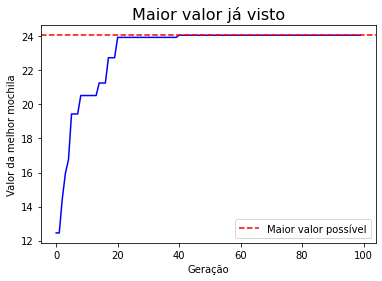

In [7]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(NUM_GERACOES), lista_melhor_fitness, c="b")
ax.axhline(y=melhor_fitness_ever, c="r", linestyle="--", label="Maior valor possível")
ax.set_xlabel("Geração")
ax.set_ylabel("Valor da melhor mochila")
ax.set_title("Maior valor já visto", fontsize=16)
ax.legend()

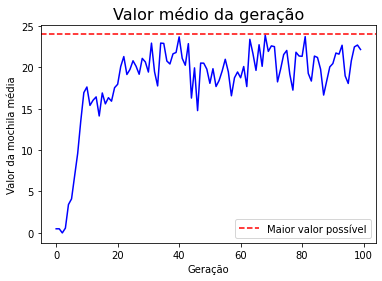

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(NUM_GERACOES), lista_fitness_medio, c="b")
ax.axhline(y=melhor_fitness_ever, c="r", linestyle="--", label="Maior valor possível")
ax.set_xlabel("Geração")
ax.set_ylabel("Valor da mochila média")
ax.set_title("Valor médio da geração", fontsize=16)
ax.legend()

## Fazendo para os itens da aula

In [9]:
# convertendo estrutura de dados
ITENS = {}
for i in OBJETOS:
    ITENS.update({i: list(OBJETOS[i].values()) })
    ITENS[i].reverse()
ITENS

{'vinil falsificado da volta do One Direction': [2500, 2],
 'Harry Potter: ele voltou, confia!': [1500, 3],
 'Quadrinho super raro do Aranha-Homem da vida real': [7000, 3],
 'mesa dobrável para laptop': [150, 3],
 'tablet': [2400, 0.6],
 'teclado musical': [3000, 3.5],
 'bicicleta': [1000, 16],
 'lições em dia': [5000, 8],
 'energético': [1500, 2],
 'docinhos para o stress': [3000, 5]}

In [10]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, NUM_GENES)

lista_fitness_medio = []

melhor_fitness_ja_visto = - float("inf") 

lista_melhor_fitness = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    lista_fitness_medio.append(np.average(fitness))
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if rd.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if rd.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness    
    lista_melhor_fitness.append(melhor_fitness_ja_visto)

In [11]:
# Busca exaustiva

melhor_fitness_ever = - float("inf")

# testando todos os subconjuntos possíveis:

NOMES_ITENS = list(ITENS.keys())

combinacoes = ()
for i in range(1, len(NOMES_ITENS)):
    combinacoes = combinacoes + tuple(combinations(NOMES_ITENS, i))
for mochila in combinacoes:
    obj = funcao_objetivo_individuo(mochila, ITENS, P)
    if obj > melhor_fitness_ever:
        melhor_fitness_ever = obj
        melhor_resposta_ever = mochila

In [12]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com valor:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com valor:", melhor_fitness_ever)


Melhor individuo obtido por algoritmos genéticos:
['Quadrinho super raro do Aranha-Homem da vida real', 'vinil falsificado da volta do One Direction', 'teclado musical', 'energético', 'lições em dia', 'tablet'] com valor: 21400

Melhor individuo obtido por busca exaustiva:
('vinil falsificado da volta do One Direction', 'Quadrinho super raro do Aranha-Homem da vida real', 'tablet', 'teclado musical', 'lições em dia', 'energético') com valor: 21400


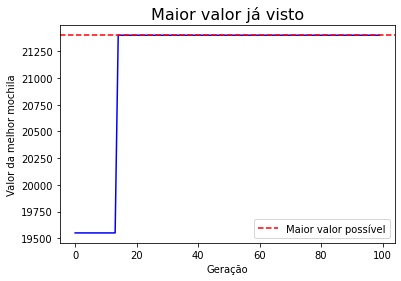

In [13]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(NUM_GERACOES), lista_melhor_fitness, c="b")
ax.axhline(y=melhor_fitness_ever, c="r", linestyle="--", label="Maior valor possível")
ax.set_xlabel("Geração")
ax.set_ylabel("Valor da melhor mochila")
ax.set_title("Maior valor já visto", fontsize=16)
ax.legend()

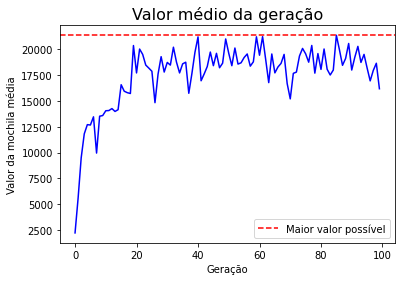

In [14]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(NUM_GERACOES), lista_fitness_medio, c="b")
ax.axhline(y=melhor_fitness_ever, c="r", linestyle="--", label="Maior valor possível")
ax.set_xlabel("Geração")
ax.set_ylabel("Valor da mochila média")
ax.set_title("Valor médio da geração", fontsize=16)
ax.legend()

## Conclusão



Para esse experimento foi preciso criar quase todas as funções do começo, a unica que foi reutilizada básicamente foi a função seleção. Para a estrutura de dados, escolhi gerar os itens possíveis como um dicionário com o nome do item nas chaves e como valores uma lista contendo o preço e o peso. Da maneira como eu implementei, tanto o preço como o peso são números (float) de 0 a 10. Para representar um indivíduo, utilizei uma lista de nomes de itens, sem nenhuma repetição. <br>
<br>
A partir disso, construí uma função objetivo, que, caso o peso seja maior que uma constante P (que eu escolhi como sendo 40), a função é 0. Caso contrario, a função é a soma dos valores dos itens na lista. Para a seleção eu utilizei a seleção torneio. Para o cruzamento, eu criei uma função que encontra o conjunto correspondente à união dos itens do pai e da mãe, e depois soteia elementos até formar um individuo com o mesmo tamanho que o pai e depois outro com o mesmo tamanho que a mãe. Já para a mutação, criei uma função que pode remover um item, ou acrescentar um item, ou trocar um item por outro dentre os possíveis. <br>
<br>
Durante a implementação, percebi que 10 itens possíveis correspondem a um espaço de busca relativamente pequeno (1024 possibilidades), o que torna difícil observar a eficiência do algoritmo, já que a chance do melhor indivíduo aparecer logo é grande. Portanto fiz o teste com 15 itens (32768 possibilidades) o que tornou o experimento mais representativo.<br>
<br>
Além disso, ao variar os hiperparêmetros, percebi que a eficiencia do algoritmo melhorou conforme aumentei a chance de cruzamento e de mutação, o que pode ser um indicativo de que esse problema é favorecido com uma maio variabilidade.